✅ Audio loaded successfully
Audio shape: (330750,)
Sample rate: 22050


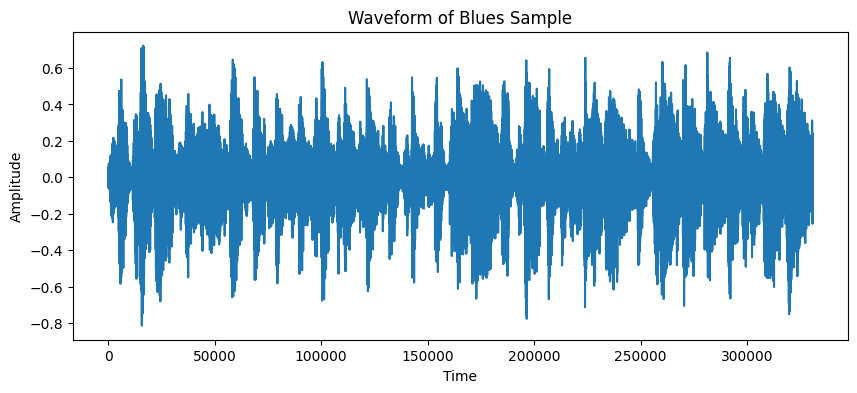

In [1]:
import os
import librosa
import matplotlib.pyplot as plt

# Dataset path
DATASET_PATH = r"C:\Users\Shrikar Gujjeti\don\Music Genre Classification\genres\audio_data"

# Pick one sample file
file_path = os.path.join(DATASET_PATH, "blues", "blues.00000.wav")

# Load audio (first 5 seconds)
audio, sr = librosa.load(file_path, duration=15)

print("✅ Audio loaded successfully")
print("Audio shape:", audio.shape)
print("Sample rate:", sr)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title("Waveform of Blues Sample")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [2]:
import os

DATASET_PATH = r"C:\Users\Shrikar Gujjeti\don\Music Genre Classification\genres\audio_data"

# List all genre folders
genres = os.listdir(DATASET_PATH)
print("Genres found:", genres)


Genres found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


MFCCs shape: (13, 646)


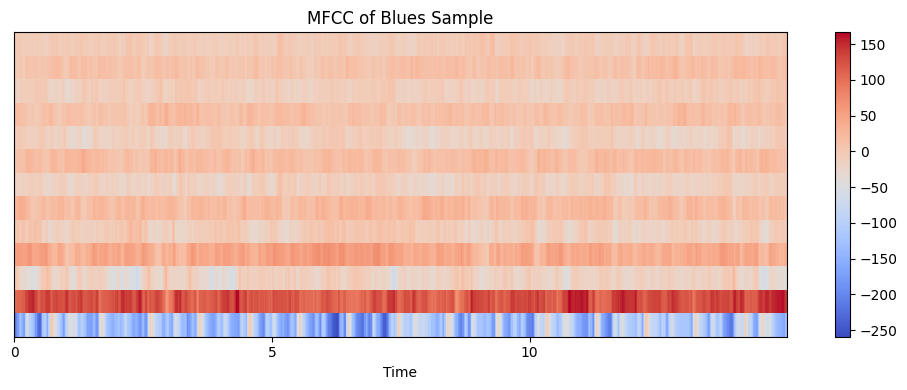

In [3]:
import librosa.display
import numpy as np

# Extract MFCC features from the same audio file
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # 13 MFCCs
print("MFCCs shape:", mfccs.shape)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCC of Blues Sample")
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Prepare lists for features and labels
features = []
labels = []

# Loop through all genres
for genre in genres:
    genre_path = os.path.join(DATASET_PATH, genre)
    for file_name in os.listdir(genre_path):
        if file_name.endswith(".wav"):
            file_path = os.path.join(genre_path, file_name)
            
            try:
                # Load audio
                audio, sr = librosa.load(file_path, duration=15)  # take up to 15s
                
                # Extract MFCCs
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfcc_mean = np.mean(mfcc.T, axis=0)  # take mean over time
                
                # Save features and label
                features.append(mfcc_mean)
                labels.append(genre)
            
            except Exception as e:
                print(f"Error with {file_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(features)
df['label'] = labels

print("✅ Dataset created successfully")
print("Shape:", df.shape)
df.head()


✅ Dataset created successfully
Shape: (990, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,-119.322220,124.261971,-18.103767,42.925957,-7.583466,19.721230,-13.704574,16.909546,-13.102381,11.939893,-8.379594,10.276628,-4.390316,blues
1,-218.362320,128.452682,1.976723,36.017479,5.693935,20.424116,-8.162189,22.301744,-7.691693,11.194468,-1.720478,8.572539,-2.486295,blues
2,-210.208450,154.123566,4.297669,25.381180,3.746819,10.979351,-3.665039,9.999147,1.809240,8.853856,0.580568,5.196112,-2.863043,blues
3,-116.901047,123.134819,-16.710115,46.677765,-8.853084,20.258205,-20.725502,22.578693,-12.129047,21.427366,-6.576118,6.913415,-13.568350,blues
4,-188.254150,118.492844,-19.380594,41.086758,-24.335009,11.998709,-9.495814,8.528673,-16.451296,4.217765,-7.896726,2.072898,-0.827837,blues


In [5]:
!pip install seaborn


✅ Model Accuracy: 0.58


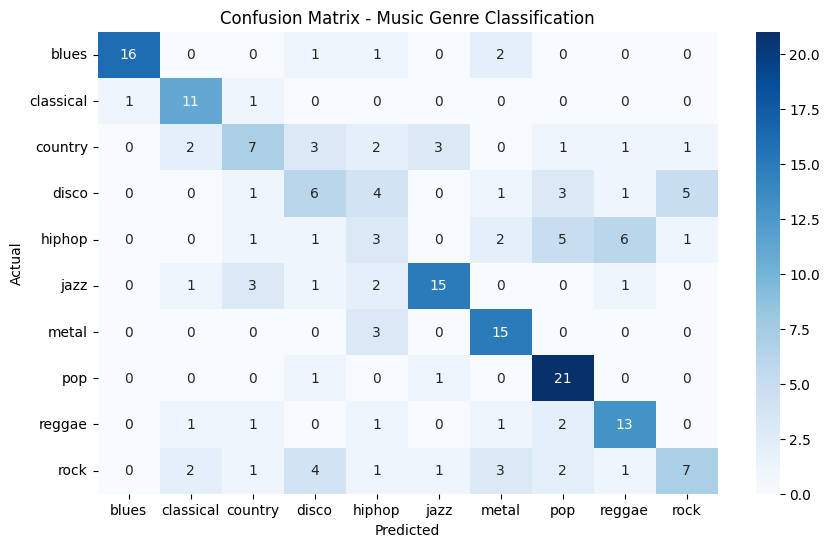

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc:.2f}")

# Confusion matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred, labels=genres)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=genres, yticklabels=genres, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Music Genre Classification")
plt.show()


Random Forest Accuracy: 0.58
SVM Accuracy: 0.51
KNN Accuracy: 0.49


C:\Users\Shrikar Gujjeti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.50


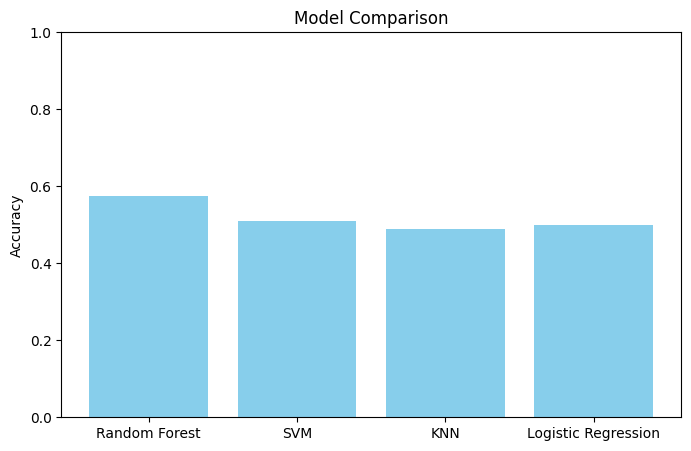

In [7]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split features and labels
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# Compare results
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 0.58
SVM Accuracy: 0.51
KNN Accuracy: 0.58
Logistic Regression Accuracy: 0.49


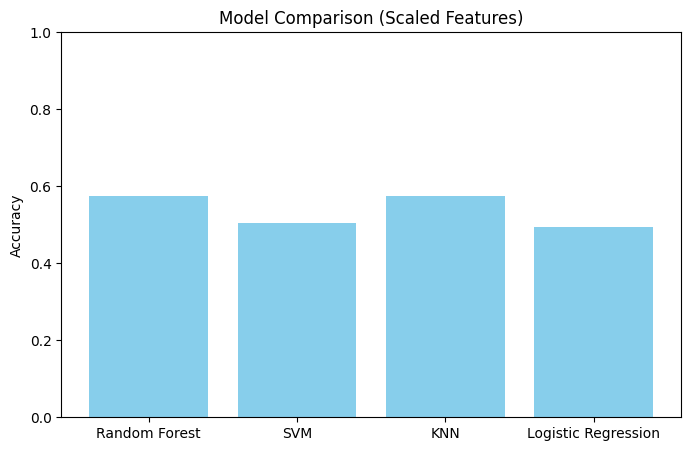

In [9]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42)  # increased iterations
}

results = {}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# Compare results visually
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.ylabel("Accuracy")
plt.title("Model Comparison (Scaled Features)")
plt.ylim(0, 1)
plt.show()


In [10]:
import pickle

# Assuming Random Forest gave the best accuracy
best_model = models["Random Forest"]

# Save the model
with open("music_genre_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Model saved as music_genre_model.pkl")


✅ Model saved as music_genre_model.pkl


In [11]:
# Load the saved model
with open("music_genre_model.pkl", "rb") as f:
    model = pickle.load(f)

# Example: new audio file
new_file = r"C:\Users\Shrikar Gujjeti\don\Music Genre Classification\genres\audio_data\jazz\jazz.00001.wav"

# Load and extract MFCCs (same as training)
audio, sr = librosa.load(new_file, duration=15)
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
mfcc_mean = np.mean(mfcc.T, axis=0)

# Scale features using same scaler
mfcc_scaled = scaler.transform([mfcc_mean])

# Predict genre
predicted_genre = model.predict(mfcc_scaled)
print(f"Predicted Genre: {predicted_genre[0]}")


Predicted Genre: jazz


In [12]:
import pickle

# Save trained model
with open("music_genre_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [13]:
import pickle
import librosa
import numpy as np

# Load model and scaler
with open("music_genre_model.pkl", "rb") as f:
    model = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Path to new audio file
new_file = r"C:\Users\Shrikar Gujjeti\don\Music Genre Classification\genres\audio_data\jazz\jazz.00001.wav"

# Extract features
audio, sr = librosa.load(new_file, duration=15)
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
mfcc_mean = np.mean(mfcc.T, axis=0)

# Scale and predict
mfcc_scaled = scaler.transform([mfcc_mean])
predicted_genre = model.predict(mfcc_scaled)

print(f"🎵 Predicted Genre: {predicted_genre[0]}")


🎵 Predicted Genre: jazz
